# **LOAD DATASET**

In [2]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 62.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


## Citra Multiband

Shape citra: (3, 512, 512)
Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 512, 'height': 512, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002694945852358559, 0.0, 104.37794780769957,
       0.0, -0.0002694945852358565, -2.1508362847673705), 'blockxsize': 512, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


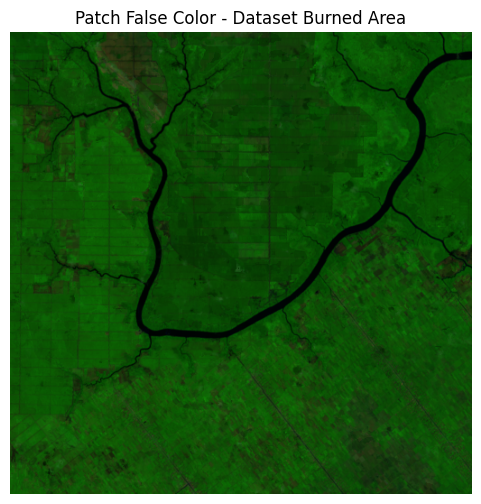

In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path ke file multiband
multiband_path = "/kaggle/input/burned-area-dataset/Data Burned Area/DATA BURNED AREA/MULTIBAND/patch_0063_124_multiband.tif"

# Buka file multiband
with rasterio.open(multiband_path) as src:
    # Ambil band 5, 4, 3
    band5 = src.read(5)
    band4 = src.read(4)
    band3 = src.read(3)

    profile = src.profile

print("Shape band5:", band5.shape)
print("Metadata:", profile)

# Stack band 5,4,3 jadi RGB
rgb = np.dstack((band5, band4, band3))

# Normalisasi supaya tampil bagus
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

# Tampilkan
plt.figure(figsize=(6, 6))
plt.imshow(rgb_norm)
plt.title("Patch Multiband (Band 5-4-3)")
plt.axis("off")
plt.show()


## Citra Mask


Shape mask: (512, 512)
Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 512, 'height': 512, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002694945852358559, 0.0, 104.37794780769957,
       0.0, -0.0002694945852358565, -2.1508362847673705), 'blockxsize': 512, 'blockysize': 16, 'tiled': False, 'interleave': 'band'}
Unique values dalam mask: [0 1]


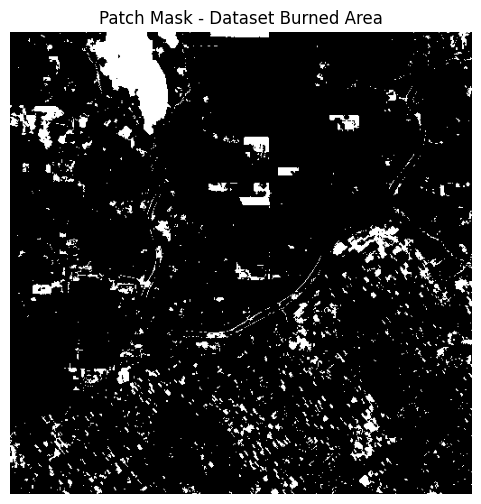

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path ke file mask
mask_path = "/kaggle/input/burned-area-dataset/Data Burned Area/DATA BURNED AREA/MASK/patch_0063_124_mask.tif"

# Buka file mask
with rasterio.open(mask_path) as src:
    mask = src.read(1)  # ambil band pertama (karena mask biasanya single-band)
    mask_profile = src.profile

print("Shape mask:", mask.shape)   # (height, width)
print("Metadata:", mask_profile)
print("Unique values dalam mask:", np.unique(mask))

# Menampilkan mask
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap="gray")  # gunakan cmap gray agar jelas 0 dan 1
plt.title("Patch Mask - Dataset Burned Area")
plt.axis("off")
plt.show()
